#### Purpose: 
Spearman Rank Correlation Coefficient (often denoted as ρ or rs) measures the strength and direction of a monotonic relationship between two variables. A monotonic relationship is one where the variables tend to increase or decrease together, but not necessarily at a constant rate.
#### Benefits for feature selection:
###### Handles non-linear relationships: Unlike Pearson correlation, which assumes a linear relationship, Spearman can capture non-linear monotonic relationships.
###### Robust to outliers: Spearman is less sensitive to outliers because it works with ranks instead of the raw data values.
###### Ordinal data: It can be used with ordinal data (e.g., rankings or survey responses with Likert scales).

ρ = 1 - (6 * Σd²) / (n * (n² - 1))

###### ρ: Spearman Rank Correlation Coefficient
###### d: Difference between the ranks of corresponding values in the two variables
###### n: Number of pairs of observations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import f_regression  # For regression tasks


In [3]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172005,172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
172006,172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172007,172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,...,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112,1


In [4]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [5]:
# Store original column names
original_columns = X.columns

In [6]:
# Calculate Pearson correlation coefficients
correlations = df.corr(method='spearman')['Label']
correlations = correlations.abs()  # Take absolute values

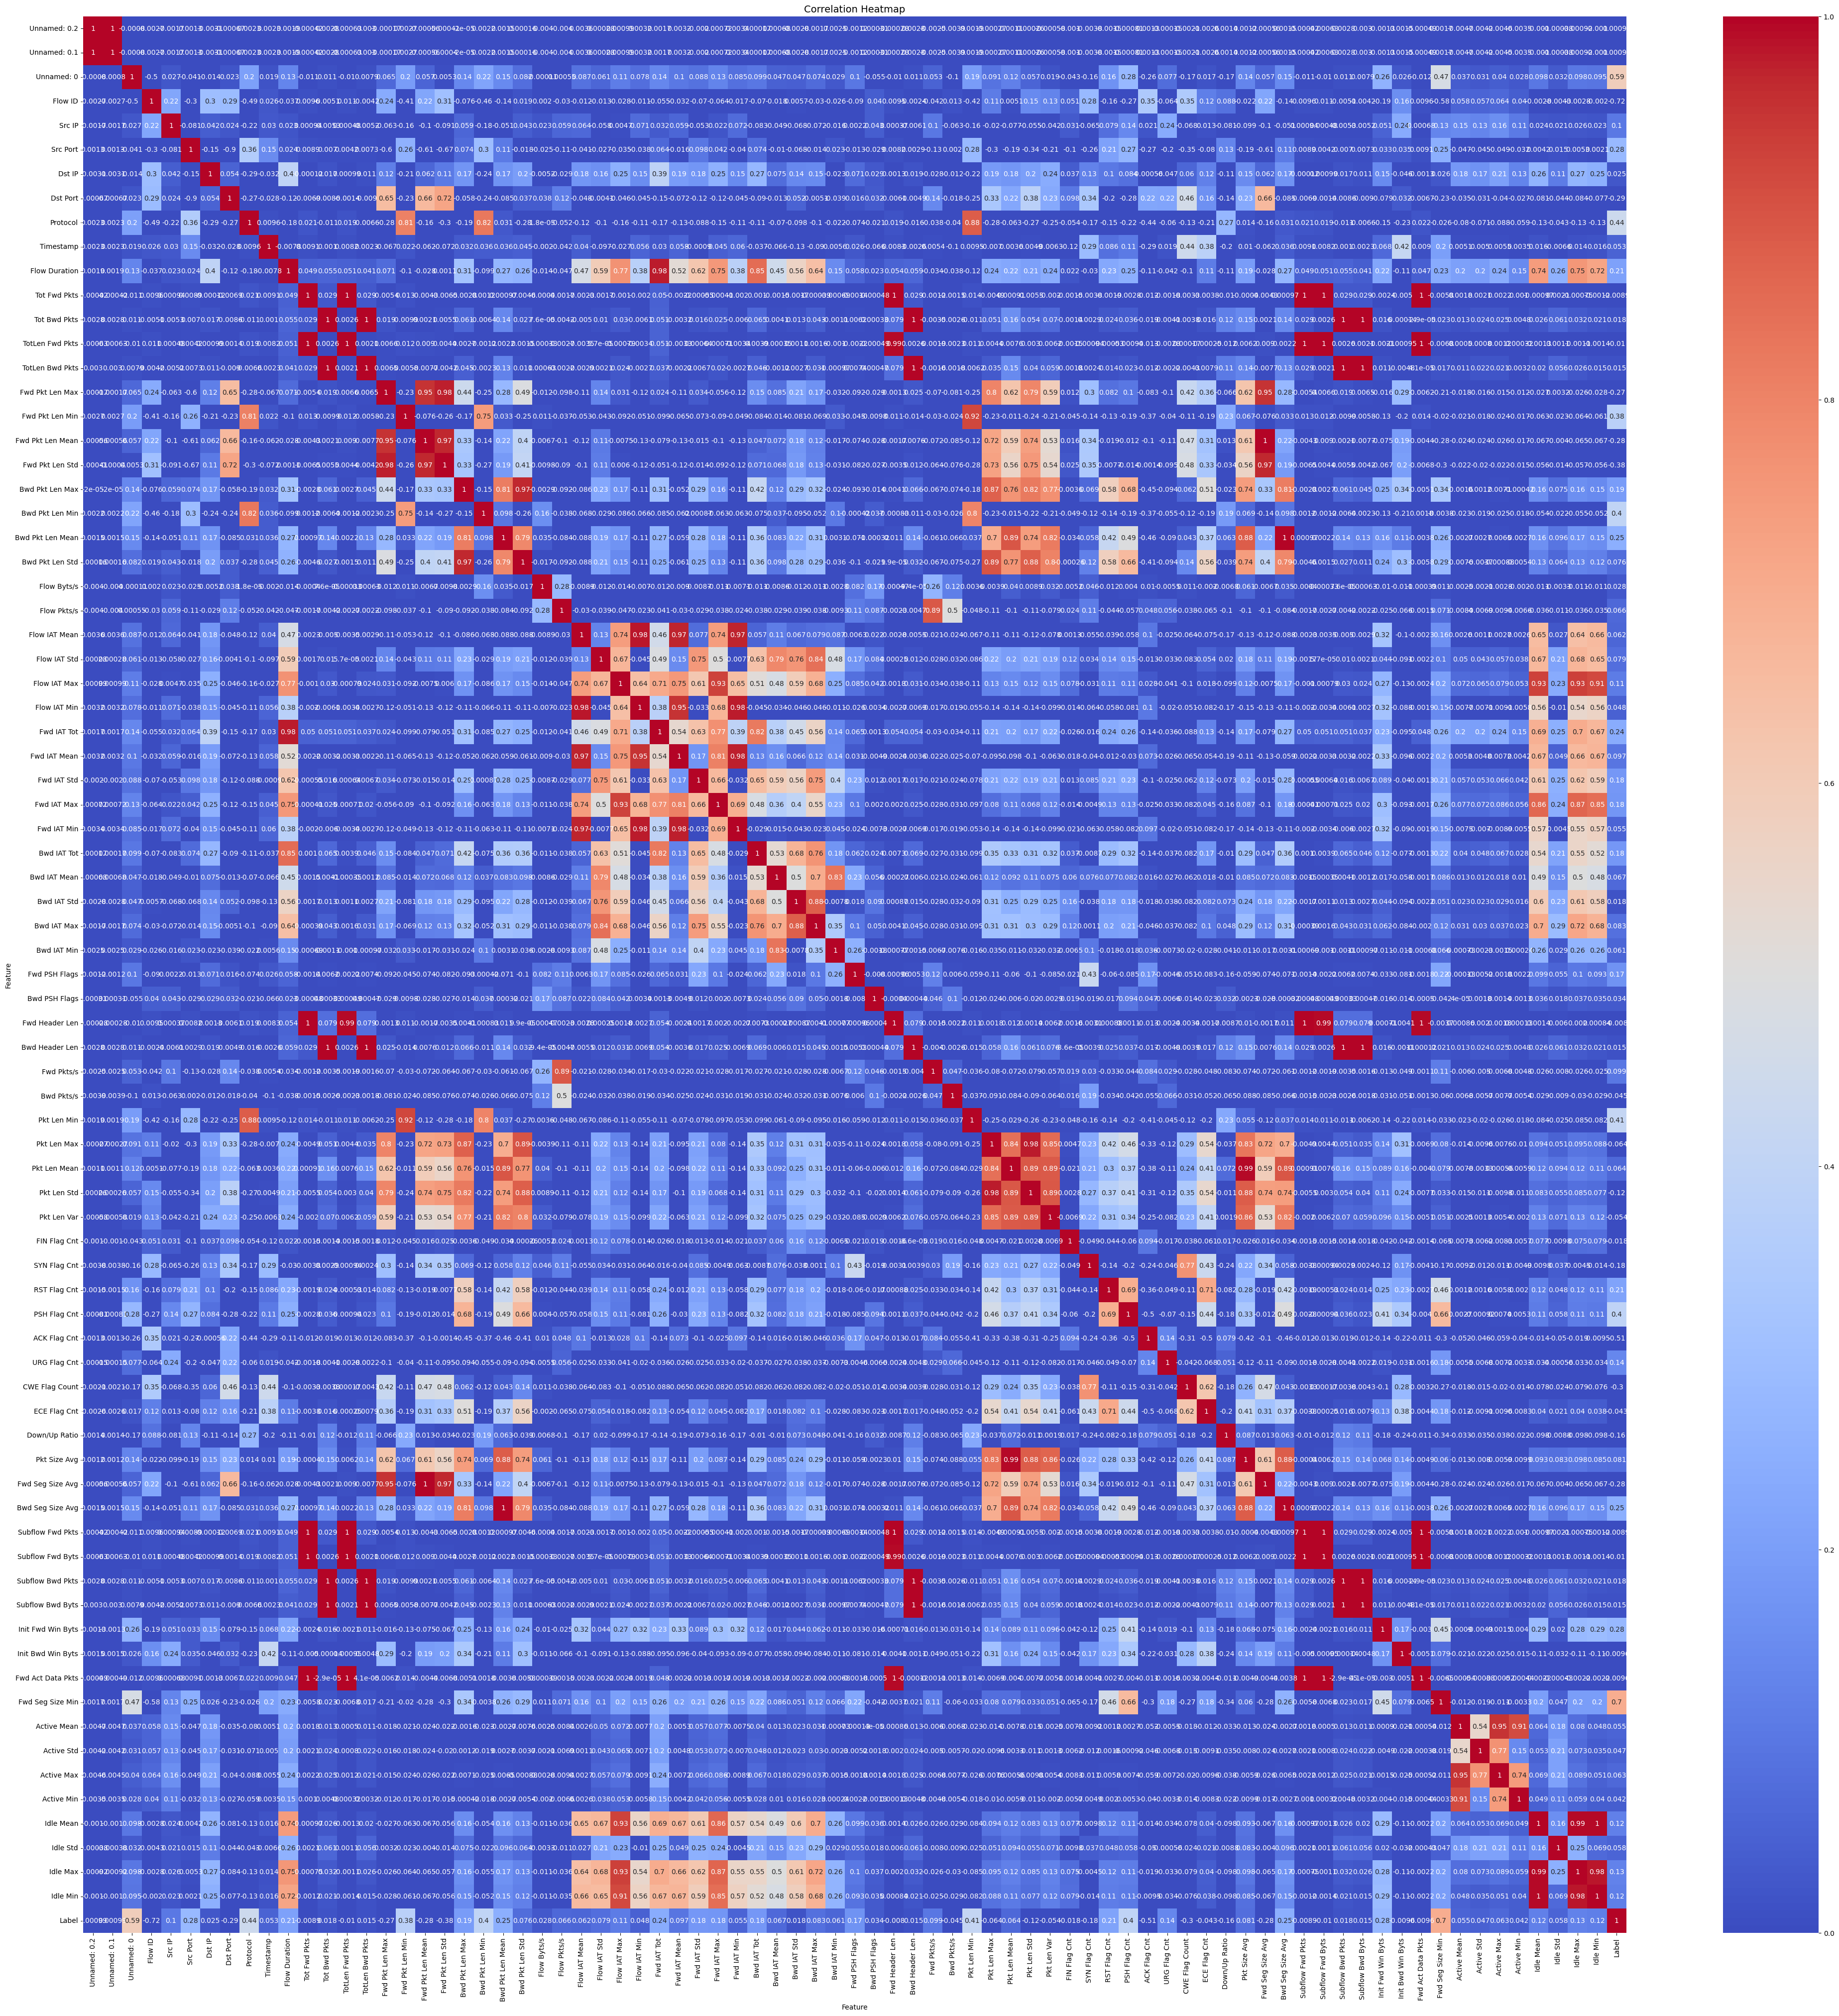

In [7]:
# Heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=.0, vmax=1)
plt.title('Correlation Heatmap', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()



In [8]:
correlations = pd.Series(correlations)
correlations.index = df.columns
correlations.sort_values(ascending=False)
correlations

Unnamed: 0.2    0.000993
Unnamed: 0.1    0.000993
Unnamed: 0      0.558792
Flow ID         0.724377
Src IP          0.344026
                  ...   
Idle Mean       0.146748
Idle Std        0.222040
Idle Max        0.147022
Idle Min        0.146276
Label           1.000000
Name: Label, Length: 79, dtype: float64

<Axes: >

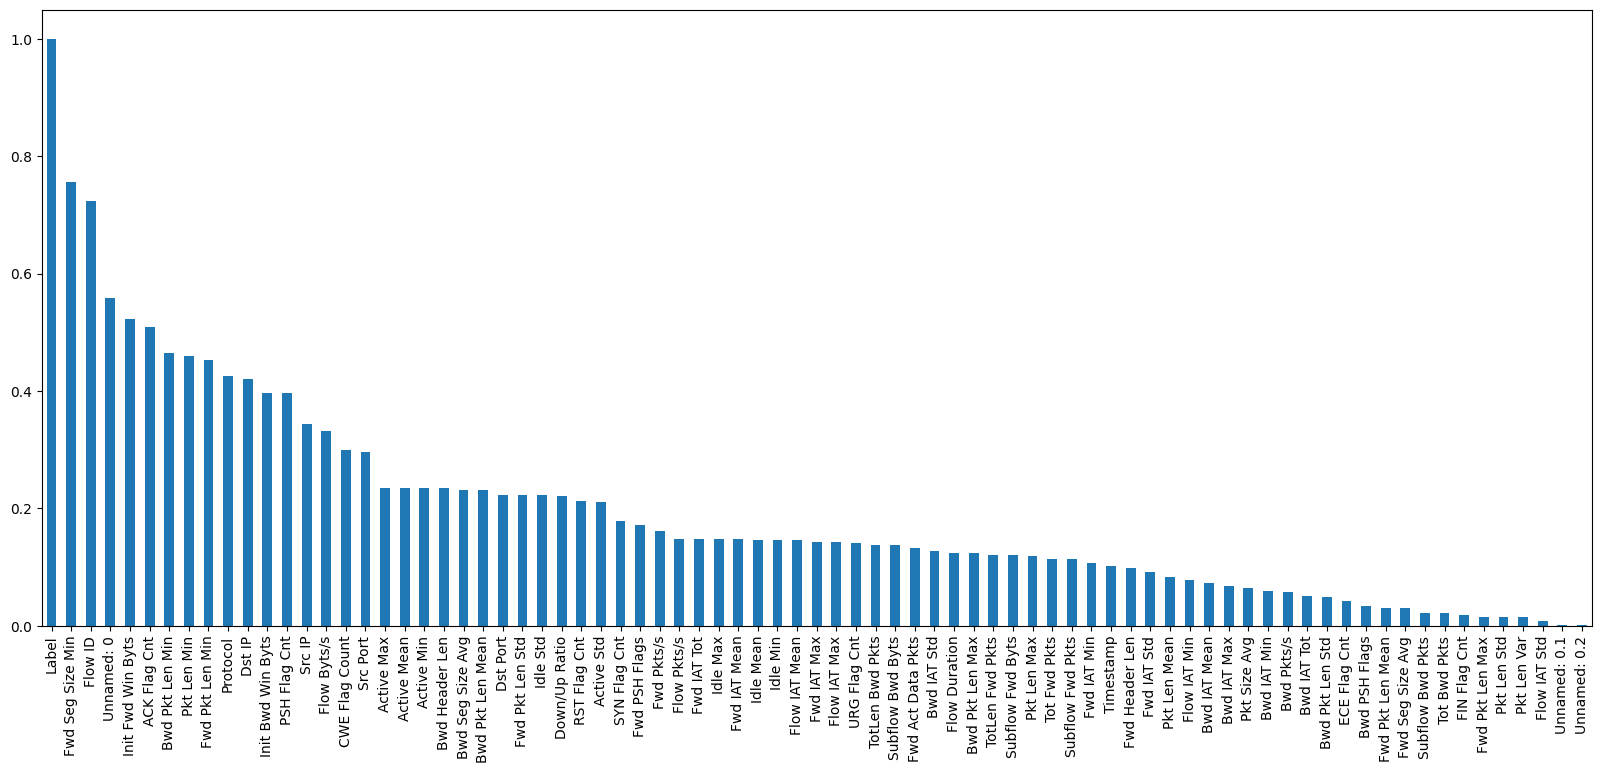

In [9]:
#let's plot the ordered mutual_info values per feature
correlations.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [14]:
# Select Top Features Based on Correlation:

threshold = 0.1

# Create a DataFrame to store results
results = pd.DataFrame({'Feature': df.columns, 'Information_Gain': correlations})

# Filter features based on the threshold
selected_features = results.query('Information_Gain >= @threshold')['Feature']
selected_features

Unnamed: 0                  Unnamed: 0
Flow ID                        Flow ID
Src IP                          Src IP
Src Port                      Src Port
Dst IP                          Dst IP
Dst Port                      Dst Port
Protocol                      Protocol
Timestamp                    Timestamp
Flow Duration            Flow Duration
Tot Fwd Pkts              Tot Fwd Pkts
TotLen Fwd Pkts        TotLen Fwd Pkts
TotLen Bwd Pkts        TotLen Bwd Pkts
Fwd Pkt Len Min        Fwd Pkt Len Min
Fwd Pkt Len Std        Fwd Pkt Len Std
Bwd Pkt Len Max        Bwd Pkt Len Max
Bwd Pkt Len Min        Bwd Pkt Len Min
Bwd Pkt Len Mean      Bwd Pkt Len Mean
Flow Byts/s                Flow Byts/s
Flow Pkts/s                Flow Pkts/s
Flow IAT Mean            Flow IAT Mean
Flow IAT Max              Flow IAT Max
Fwd IAT Tot                Fwd IAT Tot
Fwd IAT Mean              Fwd IAT Mean
Fwd IAT Max                Fwd IAT Max
Fwd IAT Min                Fwd IAT Min
Bwd IAT Std              

In [16]:
# Filter columns based on the selected features list
df_selected = df[[col for col in df.columns if col in list(selected_features)]]

(df_selected) 

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,0.504694,0.000091,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,0.000015,0.000007,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,0.967061,0.000156,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,0.036977,0.000026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,0.015704,0.000059,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,0.000320,0.000026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172005,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,0.000113,0.000007,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
172006,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,0.000010,0.000026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172007,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,0.976377,0.000085,...,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112,1


In [17]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172005,172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
172006,172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172007,172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,...,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112,1


In [18]:
df_selected.to_csv("SpearmanCorrelation.csv")